***STA 130 HW3***

Alexander Zubchenko

***1.***

https://chatgpt.com/share/66f61f3c-672c-8012-a478-84bcaba1677c

In [28]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load the dataset
penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Filter out rows with missing flipper_length_mm
penguins = penguins.dropna(subset=['flipper_length_mm'])

# Create a figure with subplots for each species
species = penguins['species'].unique()
fig = make_subplots(rows=1, cols=len(species), subplot_titles=species)

# Iterate over each species and plot histogram with annotations
for i, sp in enumerate(species):
    # Filter data for the current species
    species_data = penguins[penguins['species'] == sp]['flipper_length_mm']
    
    # Calculate statistics
    mean = species_data.mean()
    median = species_data.median()
    std = species_data.std()
    q1 = species_data.quantile(0.25)
    q3 = species_data.quantile(0.75)
    iqr = q3 - q1
    min_val = species_data.min()
    max_val = species_data.max()
    
    # Create a histogram for the current species
    hist = go.Histogram(x=species_data, name=sp, marker=dict(color='skyblue'), opacity=0.75, showlegend=False)
    
    # Add the histogram to the subplot
    fig.add_trace(hist, row=1, col=i+1)
    
    # Add vertical lines for mean and median, aligned but staggered vertically
    fig.add_vline(x=mean, line=dict(color='red', dash='dash'), row=1, col=i+1,
                  annotation_text="Mean", annotation_position="top", annotation_yref="paper", annotation_y=1.04)
    
    fig.add_vline(x=median, line=dict(color='green', dash='dash'), row=1, col=i+1,
                  annotation_text="Median", annotation_position="top", annotation_yref="paper", annotation_y=1.07)
    
    # Add vertical rectangles for range, IQR, and 2 standard deviations
    fig.add_vrect(x0=min_val, x1=max_val, fillcolor="blue", opacity=0.1, row=1, col=i+1, 
                  line_width=0, annotation_text="Range", annotation_position="bottom", annotation_y=-0.1)
    
    fig.add_vrect(x0=q1, x1=q3, fillcolor="orange", opacity=0.2, row=1, col=i+1, 
                  line_width=0, annotation_text="IQR", annotation_position="bottom", annotation_y=-0.15)
    
    fig.add_vrect(x0=mean-2*std, x1=mean+2*std, fillcolor="purple", opacity=0.2, row=1, col=i+1, 
                  line_width=0, annotation_text="±2 SD", annotation_position="bottom", annotation_y=-0.2)

# Update layout for better visualization
fig.update_layout(title_text="Flipper Length Distribution with Annotations for Each Species",
                  barmode='overlay', showlegend=False, height=600, width=1000)

# Show the plot
fig.show()


***2.***

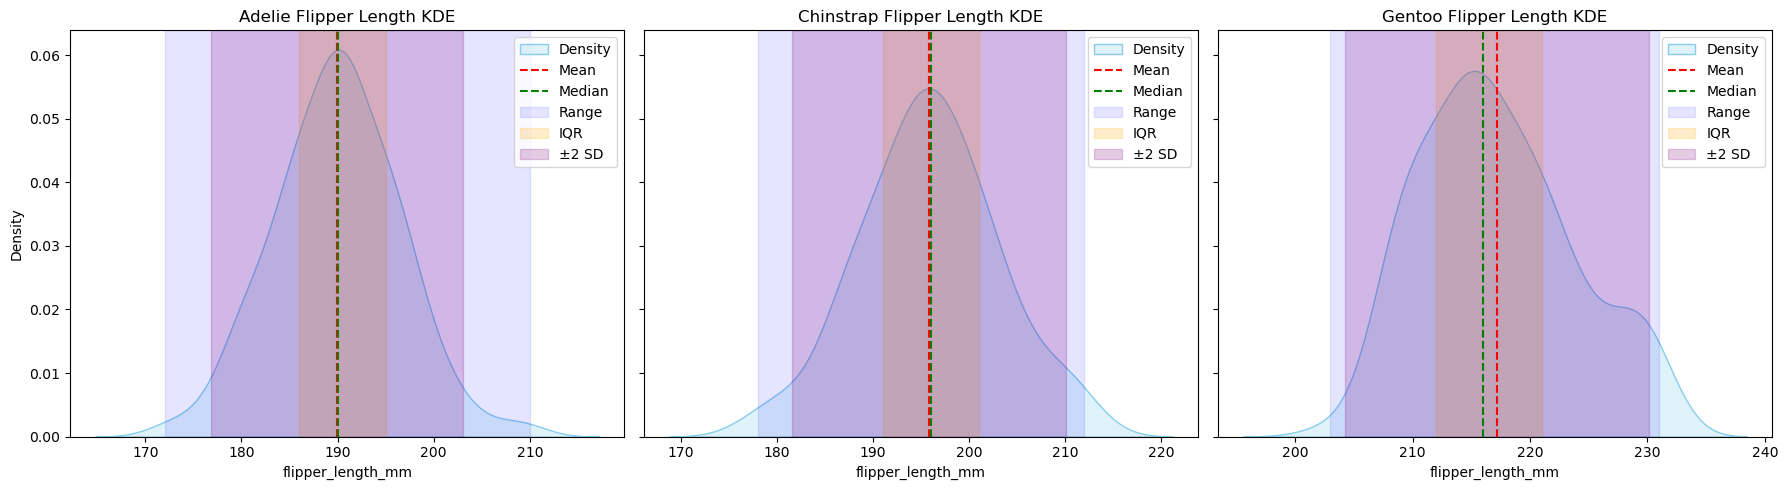

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Filter out rows with missing flipper_length_mm
penguins = penguins.dropna(subset=['flipper_length_mm'])

# Define a figure with 3 subplots, one for each species
species = penguins['species'].unique()
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Iterate over each species and create KDE plots with annotations
for i, sp in enumerate(species):
    # Filter data for the current species
    species_data = penguins[penguins['species'] == sp]['flipper_length_mm']
    
    # Calculate statistics
    mean = species_data.mean()
    median = species_data.median()
    std = species_data.std()
    q1 = species_data.quantile(0.25)
    q3 = species_data.quantile(0.75)
    min_val = species_data.min()
    max_val = species_data.max()
    
    # Create a KDE plot for the current species
    sns.kdeplot(species_data, ax=axes[i], fill=True, color='skyblue', label='Density')
    axes[i].set_title(f'{sp} Flipper Length KDE')
    
    # Add vertical lines for mean and median
    axes[i].axvline(mean, color='red', linestyle='--', label='Mean')
    axes[i].axvline(median, color='green', linestyle='--', label='Median')
    
    # Add shaded regions for range, IQR, and ±2 standard deviations
    axes[i].axvspan(min_val, max_val, color='blue', alpha=0.1, label='Range')
    axes[i].axvspan(q1, q3, color='orange', alpha=0.2, label='IQR')
    axes[i].axvspan(mean-2*std, mean+2*std, color='purple', alpha=0.2, label='±2 SD')
    
    # Add a legend to each subplot
    axes[i].legend(loc='upper right')

# Adjust layout to ensure titles and labels don't overlap
plt.tight_layout()

# Show the plot
plt.show()

***ChatGPT Summary:*** https://chatgpt.com/share/66f61f3c-672c-8012-a478-84bcaba1677c
    
In this interaction, you requested assistance in transitioning from using Plotly histograms to Seaborn kernel density estimation (KDE) plots to visualize the flipper_length_mm for different penguin species. The solution involved creating a row of three KDE plots, one for each species, and overlaying vertical lines and shaded regions to represent key statistics like the mean, median, range, interquartile range (IQR), and ±2 standard deviations. The annotations were aligned with the KDE plots and well-organized for clarity.

***3.***

***ChatGPT Summary:*** https://chatgpt.com/share/66f624e0-a75c-8012-a894-b19f6e667477


In our discussion, we compared three data visualization methods: box plots, histograms, and kernel density estimations (KDEs).

**Box Plots**:
- **Pros**: Simple to read, highlight outliers, and facilitate comparative analysis across groups.
- **Cons**: Provide limited detail about the data distribution, can be sensitive to sample size, and may obscure variations within the data.

**Histograms**:
- **Pros**: Effectively display the shape and spread of data, flexible in adjusting bin widths, and provide clear frequency information.
- **Cons**: Highly sensitive to bin size, can result in data loss depending on binning choices, and do not explicitly highlight outliers.

**Kernel Density Estimation (KDE)**:
- **Pros**: Offers a smooth, continuous representation of the data distribution, less sensitive to bin choices than histograms, and insightful for understanding distribution shape.
- **Cons**: Sensitive to bandwidth selection, can mislead interpretation with sparse data, and may require more statistical knowledge for accurate interpretation.

Overall, each visualization method has its strengths and weaknesses, making them appropriate for different analytical contexts and goals.

***My preferred visualization method:***

My preferred method of visualization data is through a Kernel Density Estimation (KDE). As a beginner, it can be difficult understanding all the intricacies of a dataset immediately using box plots or a histogram. So, I enjoy first analyzing the general shape of a data distribution using a KDE. Once I have the general shape of a distribution understood, I then could switch from the KDE, or compare and contrast the distribution with a histogram or box plot. This way, I could catch any misleading interpretation caused by a KDE visualization.

***4.***

DSSSSSSSS